In [1]:
# Importing necessary libraries

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Readiing the combined dataset

df_flights = pd.read_csv(r'E:/Mumbai_Airport-International_Flight_Analysis/data/processed/flights_data_combined.csv')
df_flights.head()

,_id,Year,Quarter,Origin,Dest,Pax From Origin,Pax To Origin,Freight From Origin,Frieght To Origin
0,1,2015,1,MUMBAI,ABUDHABI,80696,65961,1940.80,1118.21
1,2,2015,2,MUMBAI,ABUDHABI,83807,79788,2578.68,1487.49
2,3,2015,3,MUMBAI,ABUDHABI,86560,70306,2661.29,2017.14
3,4,2015,4,MUMBAI,ABUDHABI,92011,90657,48903.98,1936.51
4,5,2015,1,MUMBAI,ADDIS ABABA,20996,16326,2622.94,116.01


In [3]:
# Checking the shape of the dataset

df_flights.shape

(1812, 9)

In [4]:
# Checking the columns of the dataset

df_flights.columns

Index(['_id', 'Year', 'Quarter', 'Origin', 'Dest', 'Pax From Origin',
       'Pax To Origin', 'Freight From Origin', 'Frieght To Origin'],
      dtype='object')

In [5]:
# Checking the informtion of the dataset

df_flights.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1812 entries, 0 to 1811
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   _id                  1812 non-null   int64  
 1   Year                 1812 non-null   int64  
 2   Quarter              1812 non-null   int64  
 3   Origin               1812 non-null   object 
 4   Dest                 1812 non-null   object 
 5   Pax From Origin      1812 non-null   int64  
 6   Pax To Origin        1812 non-null   int64  
 7   Freight From Origin  1812 non-null   float64
 8   Frieght To Origin    1812 non-null   float64
dtypes: float64(2), int64(5), object(2)
memory usage: 127.5+ KB


In [6]:
# Checking descriptive statistics of the dataset

df_flights.describe()

,_id,Year,Quarter,Pax From Origin,Pax To Origin,Freight From Origin,Frieght To Origin
count,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000
mean,93.789183,2019.155077,2.444812,26879.288079,25108.639073,1286.747152,873.033515
std,55.755142,2.732853,1.112521,45357.233060,43139.202931,2488.130233,1559.967978
min,1.000000,2015.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,2017.000000,1.000000,824.250000,834.500000,30.590000,1.037500
50%,91.000000,2019.000000,2.000000,11493.000000,10956.500000,409.585000,96.635000
75%,141.000000,2021.000000,3.000000,35650.250000,32922.000000,1421.475000,865.865000
max,210.000000,2024.000000,4.000000,338533.000000,334269.000000,48903.980000,7932.740000


In [7]:
df_flights.rename(columns={'Frieght To Origin': 'Freight To Origin'}, inplace=True)  # Correcting the column name

In [8]:
df_flights.columns

Index(['_id', 'Year', 'Quarter', 'Origin', 'Dest', 'Pax From Origin',
       'Pax To Origin', 'Freight From Origin', 'Freight To Origin'],
      dtype='object')

In [9]:
# Assuming df_flights is your DataFrame
flights_count = df_flights.groupby(['Year', 'Dest']).size().reset_index(name='Total Flights')

# Print the first few rows to verify
print(flights_count.head())

   Year         Dest  Total Flights
0  2015     ABUDHABI              4
1  2015  ADDIS ABABA              3
2  2015         ADEN              4
3  2015    AMSTERDAM              1
4  2015      BAHRAIN              4


In [10]:
pivot_flights = flights_count.pivot(index='Year', columns='Dest', values='Total Flights')

# Print the first few rows to verify
print(pivot_flights.head())

Dest  ABUDHABI  ADDIS ABABA  ADEN  AMMAN  AMSTERDAM  ANTALYA  AUCKLAND  \
Year                                                                     
2015       4.0          3.0   4.0    NaN        1.0      NaN       NaN   
2016       4.0          4.0   4.0    NaN        4.0      3.0       NaN   
2017       4.0          4.0   4.0    NaN        4.0      4.0       NaN   
2018       4.0          4.0   4.0    NaN        4.0      NaN       NaN   
2019       4.0          2.0   4.0    NaN        4.0      NaN       NaN   

Dest  Atyrau  BAHRAIN  BANGKOK  ...  TEHRAN  TELAVIV  TORONTO  Turkmenabat  \
Year                            ...                                          
2015     NaN      4.0      4.0  ...     4.0      4.0      NaN          NaN   
2016     NaN      4.0      4.0  ...     4.0      4.0      NaN          NaN   
2017     NaN      4.0      4.0  ...     4.0      4.0      1.0          NaN   
2018     NaN      4.0      4.0  ...     4.0      4.0      4.0          NaN   
2019     NaN 

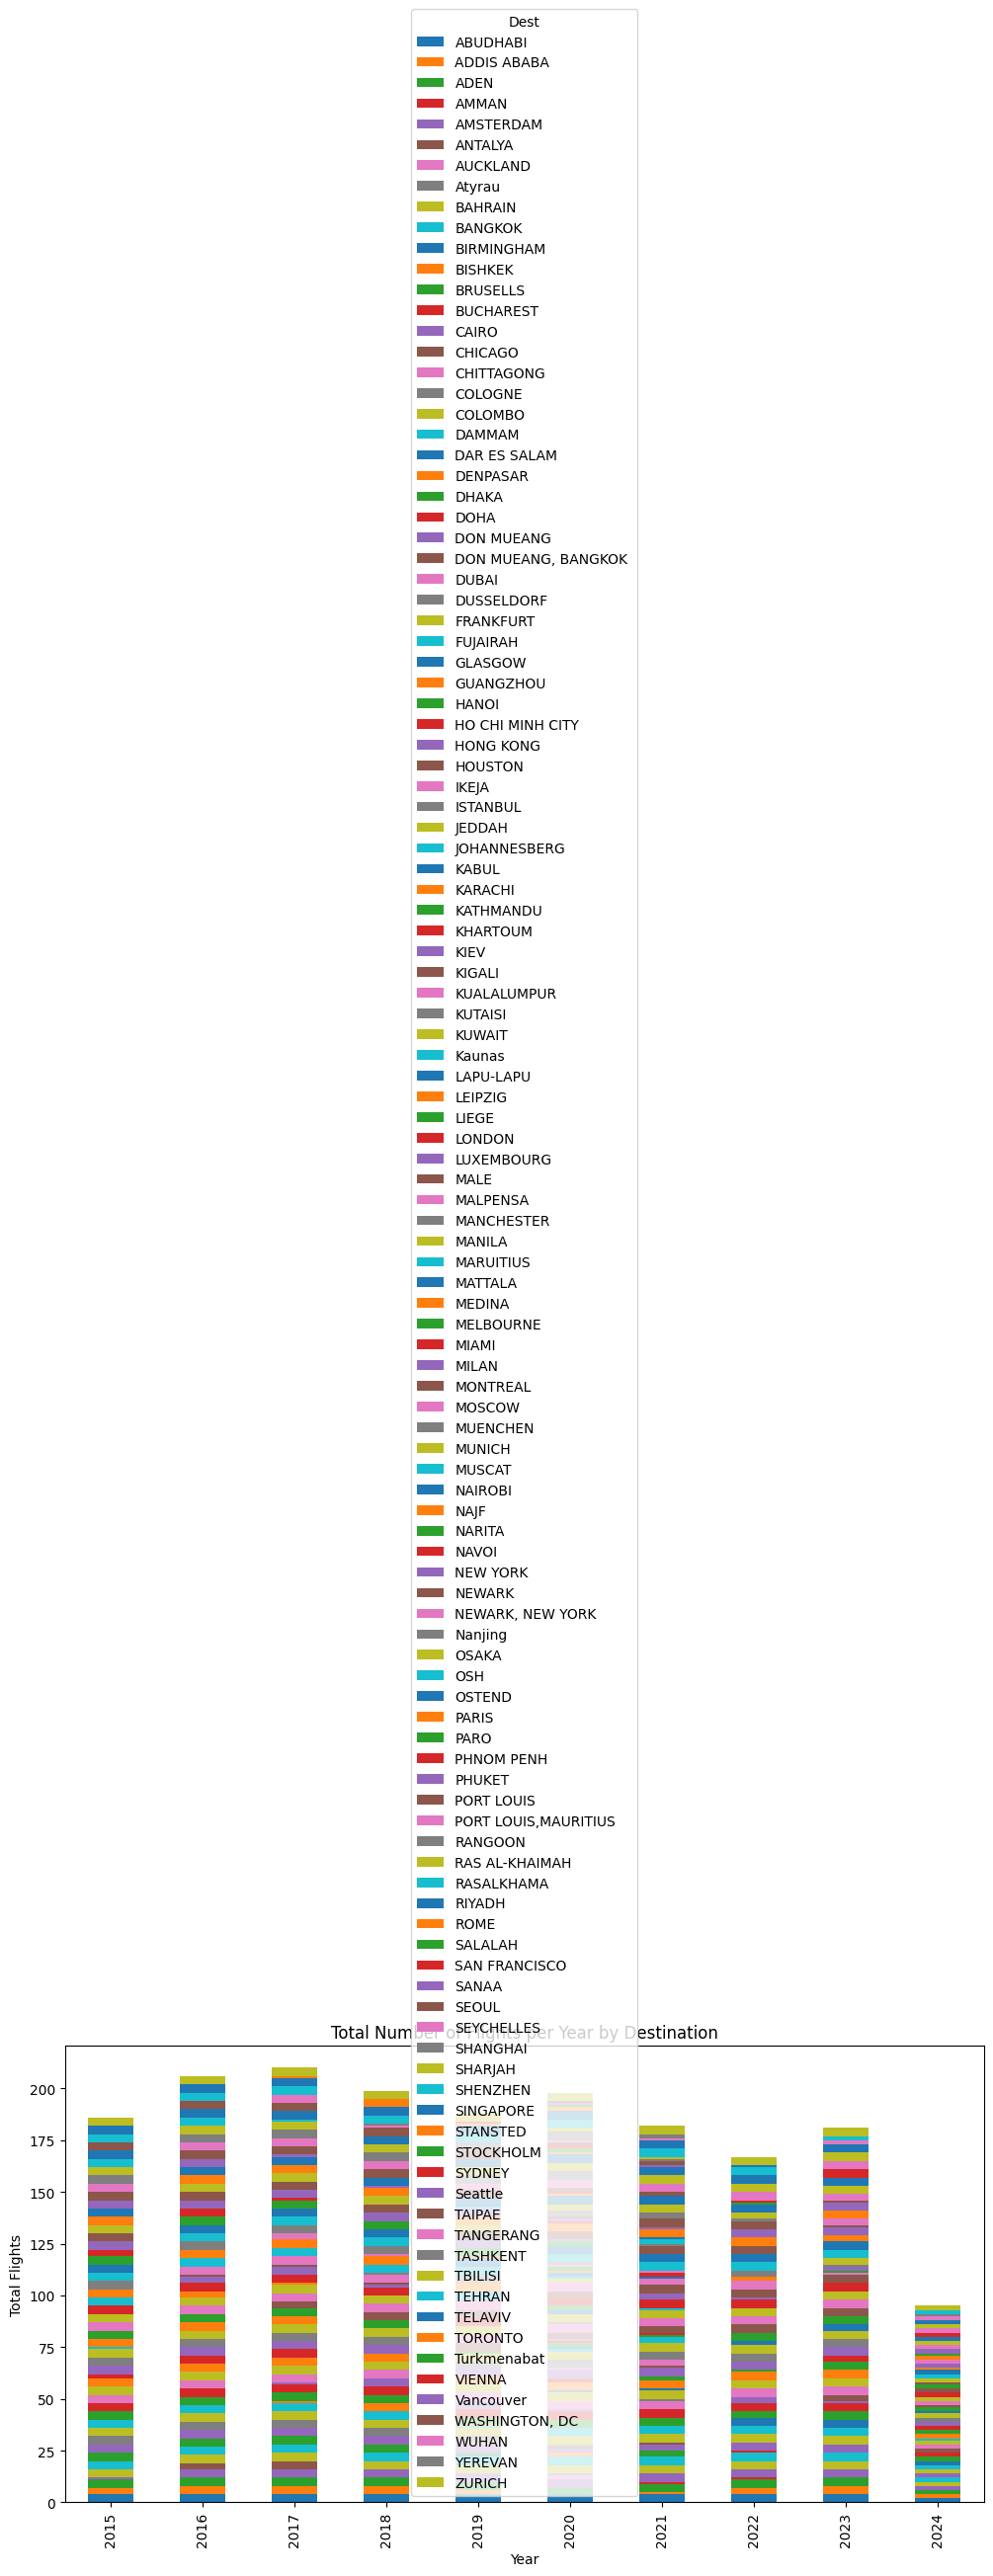

In [13]:
pivot_flights.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Total Number of Flights per Year by Destination')
plt.xlabel('Year')
plt.ylabel('Total Flights')
plt.show()


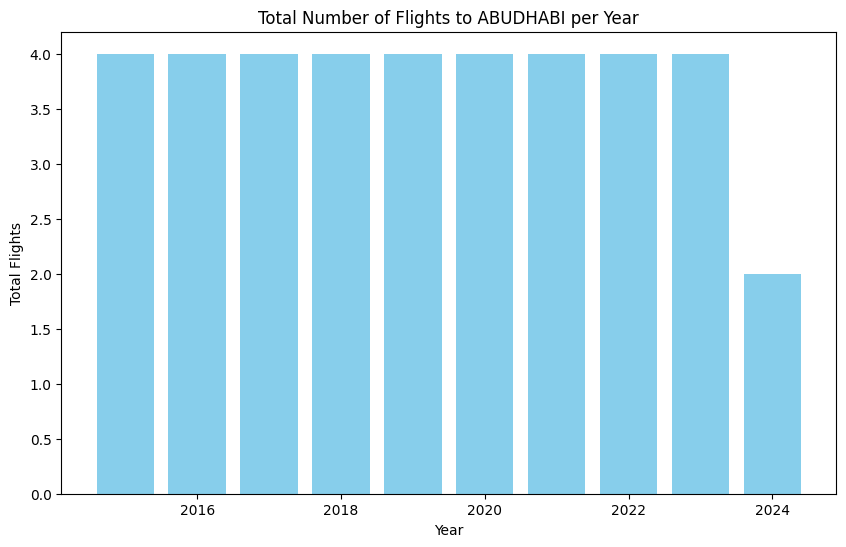

In [12]:
# Filter for ABUDHABI destination
df_abudhabi = df_flights[df_flights['Dest'] == 'ABUDHABI']

# Group and count flights by year
flights_count_abudhabi = df_abudhabi.groupby('Year').size().reset_index(name='Total Flights')

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(flights_count_abudhabi['Year'], flights_count_abudhabi['Total Flights'], color='skyblue')
plt.title('Total Number of Flights to ABUDHABI per Year')
plt.xlabel('Year')
plt.ylabel('Total Flights')
plt.show()
